## 2.เขียนโปรแกรมแสดงความสัมพันธ์ระหว่าง complexity ของ model และ etrain, etest ของ ridge regression (Lecture หน้าที่ 44)

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



### Step 1: Generate synthetic data


In [214]:
data = pd.read_csv('/Users/jittapat.a/Documents/code/ปี4/ML/HW04/HeightWeight100.csv')

X = data[['Height']].values
y = data[['Weight']].values

data

,Height,Weight
0,187.571423,109.720985
1,174.706036,73.622732
2,188.239668,96.497550
3,182.196685,99.809504
4,177.499762,93.598619
...,...,...
95,168.078537,62.041159
96,170.350573,77.504315
97,162.224700,58.275377
98,175.346978,74.322166


In [215]:
# # ปรับข้อมูลด้วย StandardScaler
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()

# X_normalized = scaler_X.fit_transform(X)
# y_normalized = scaler_y.fit_transform(y)

# print(X_normalized)

Text(0, 0.5, 'Weight')

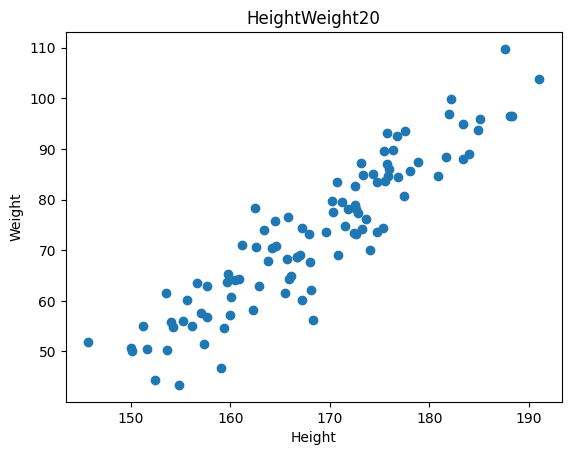

In [216]:
plt.title("HeightWeight20")
plt.scatter(X, y, label='Data')
plt.xlabel("Height")
plt.ylabel("Weight")

In [217]:
# จำนวนข้อมูล
n = np.size(X)

# คำนวณค่าเฉลี่ยของ x และ y
m_x = np.mean(X)
m_y = np.mean(y)

# คำนวณ cross-deviation และ deviation เกี่ยวกับ x
SS_xy = np.sum(y * X) - n * m_y * m_x
SS_xx = np.sum(X * X) - n * m_x * m_x

# คำนวณค่าสัมประสิทธิ์ (coefficients)
w1 = SS_xy / SS_xx #ค่าความชัน
w0 = m_y - w1 * m_x#ค่าจุดตัดแกน y

print("ค่าสัมประสิทธิ์(ค่าความชัน) = ", w1)
print("bias(ค่าจุดตัดแกน y) = ", w0)

# คำนวณค่าที่ทำนาย (predicted values)
Y_pred = w0 + w1 * X
print("y ทำนาย = ", Y_pred)

# คำนวณค่า cost function โดยใช้ Mean Squared Error (MSE) วัดค่าเสียหายระหว่างค่าที่ทำนายได้ y ทำนาย กับ y จริง
mse = np.mean((y - Y_pred) ** 2)
print("MSE =", mse)

ค่าสัมประสิทธิ์(ค่าความชัน) =  1.3412644827306561
bias(ค่าจุดตัดแกน y) =  -152.7624813623435
y ทำนาย =  [[ 98.82040655]
 [ 81.56452005]
 [ 99.71669916]
 [ 91.61146123]
 [ 85.31164443]
 [ 76.35588507]
 [ 81.57534418]
 [ 80.08804685]
 [ 75.55846618]
 [ 63.42185022]
 [ 89.78678612]
 [ 91.30425788]
 [ 67.88421208]
 [ 83.27189836]
 [ 83.13788176]
 [ 77.69341306]
 [ 93.95309321]
 [ 65.18600547]
 [ 84.48809543]
 [ 78.68270064]
 [ 78.6113121 ]
 [ 83.80462085]
 [ 72.59516107]
 [103.45011596]
 [ 78.53686012]
 [ 79.39141272]
 [ 82.61288925]
 [ 95.25629033]
 [ 76.92900148]
 [ 80.59191377]
 [ 81.00650641]
 [ 99.45676707]
 [ 90.92068803]
 [ 82.92130685]
 [ 84.27395169]
 [ 87.08023296]
 [ 82.56703276]
 [ 76.15320566]
 [ 71.43065727]
 [ 66.30978378]
 [ 78.81328843]
 [ 93.17330578]
 [ 69.60130101]
 [ 72.39431382]
 [ 77.2324776 ]
 [ 86.07133073]
 [ 79.7586795 ]
 [ 93.11635475]
 [ 82.920273  ]
 [ 95.49312048]
 [ 55.43025549]
 [ 65.63888866]
 [ 61.94912318]
 [ 56.00132151]
 [ 50.62085821]
 [ 69.67297497]


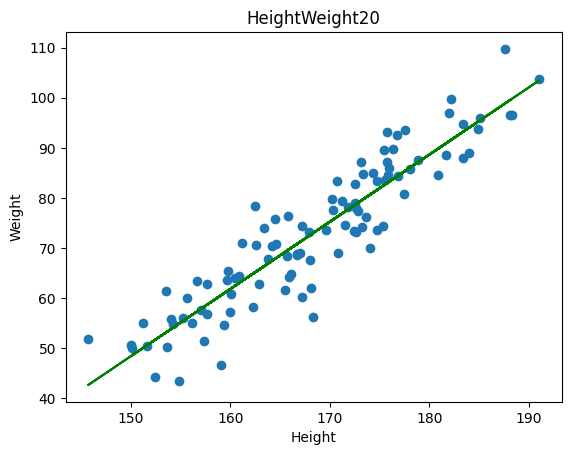

In [218]:
plt.title("HeightWeight20")
plt.scatter(X, y, label='Data')
plt.xlabel("Height")
plt.ylabel("Weight")


plt.plot(X, Y_pred, color='green', label='linear regression')

## แบ่งข้อมูลเป็น train set และ test set (80:20)

In [219]:
train, test = train_test_split(data, test_size=0.2, random_state=1)

## เตรียมข้อมูล train

In [220]:
predictors = ["Height"]
target = "Weight"

X_train = train[predictors].copy()
y_train = train[[target]].copy()

In [221]:
X_train

,Height
2,188.239668
73,154.272058
97,162.224700
62,167.016551
19,172.557452
...,...
75,168.279885
9,161.179495
72,154.060482
12,164.506476


In [222]:
y_train

,Weight
2,96.497550
73,54.851293
97,58.275377
62,69.075089
19,82.747268
...,...
75,56.254442
9,70.941642
72,55.830051
12,75.807679


In [223]:
x_mean = X_train.mean()
x_std = X_train.std()

print("X mean = ",x_mean)
print("X std = ",x_std)

X mean =  Height    169.089949
dtype: float64
X std =  Height    9.496221
dtype: float64


In [224]:
X_train = (X_train - x_mean) / x_std
X_train

,Height
2,2.016562
73,-1.560399
97,-0.722945
62,-0.218339
19,0.365146
...,...
75,-0.085304
9,-0.833011
72,-1.582679
12,-0.482663


In [225]:
X_train["intercept"] = 1
X_train = X_train[["intercept"] + predictors]
X_train

,intercept,Height
2,1,2.016562
73,1,-1.560399
97,1,-0.722945
62,1,-0.218339
19,1,0.365146
...,...,...
75,1,-0.085304
9,1,-0.833011
72,1,-1.582679
12,1,-0.482663


In [226]:
X_train.T

,2,73,97,62,19,35,94,27,46,38,...,1,16,64,79,5,75,9,72,12,37
intercept,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
Height,2.016562,-1.560399,-0.722945,-0.218339,0.365146,1.024451,-1.998731,1.666367,0.449623,-0.204225,...,0.591402,1.564051,-1.027732,-1.207604,0.182463,-0.085304,-0.833011,-1.582679,-0.482663,0.16655


## Ridge Regression parameters

In [227]:
A_Lambda = 2
I = np.identity(X_train.shape[1])
I


array([[1., 0.],
       [0., 1.]])

In [228]:
penalty = A_Lambda * I
penalty[0][0] = 0
penalty

array([[0., 0.],
       [0., 2.]])

## Calculate coefficients

In [229]:
B = np.linalg.inv(X_train.T @ X_train + penalty) @ X_train.T @ y_train
B.index = ["intercept","Height"]
B

,Weight
intercept,73.791775
Height,13.021415


## ทำนาย และ คำนวณ RMSE

In [230]:
y_train_pred = X_train @ B
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Train RMSE: {rmse_train}")

Train RMSE: 5.541442709552242


## plot

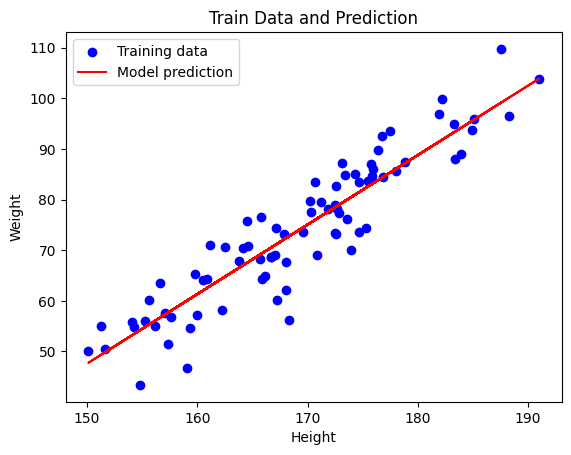

In [231]:
plt.title("Train Data and Prediction")
plt.scatter(train[predictors], y_train, color='blue', label='Training data')
plt.xlabel("Height")
plt.ylabel("Weight")

plt.plot(train[predictors],y_train_pred,color='red', label='Model prediction')
plt.legend()

In [232]:
test_x = test[predictors]
test_x

,Height
80,153.599545
84,149.979453
33,175.717609
81,153.525890
93,152.477302
17,162.494787
36,175.453475
82,177.466019
69,173.234057
65,165.525892


In [233]:
test_x = (test_x - x_mean) / x_std
test_x

,Height
80,-1.631218
84,-2.012432
33,0.697926
81,-1.638974
93,-1.749396
17,-0.694504
36,0.670111
82,0.882042
69,0.436395
65,-0.375313


In [234]:
test_x["intercept"] = 1
test_x = test_x[["intercept"] + predictors]

test_x

,intercept,Height
80,1,-1.631218
84,1,-2.012432
33,1,0.697926
81,1,-1.638974
93,1,-1.749396
17,1,-0.694504
36,1,0.670111
82,1,0.882042
69,1,0.436395
65,1,-0.375313


In [235]:
y_test_pred = test_x @ B
rmse_test = np.sqrt(mean_squared_error(test[target], y_test_pred))
print(f"Test RMSE: {rmse_test}")

Test RMSE: 6.4670182143663615


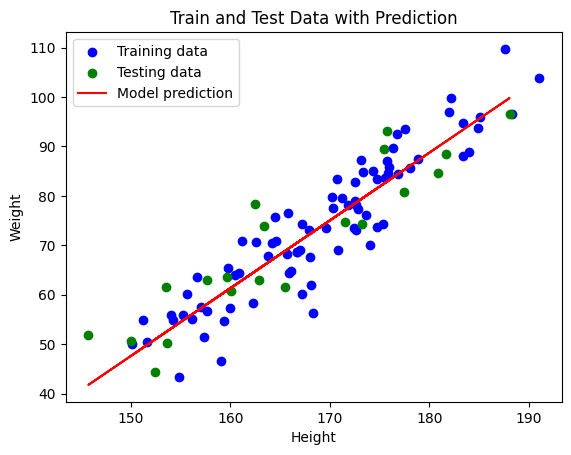

In [236]:
plt.title('Train and Test Data with Prediction')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(train[predictors], y_train, color='blue', label='Training data')
plt.scatter(test[predictors], test[target], color='green', label='Testing data')

plt.plot(test[predictors], y_test_pred, color='red', label='Model prediction')
plt.legend()

## def ridege regression สำหรับการ fit โมเดล

In [237]:
def ridge_fit(train,predictors,target,A_Lambda):
    X_train = train[predictors].copy()
    y_train = train[[target]].copy()
    
    x_mean = X_train.mean()
    x_std = X_train.std()
    
    X_train = (X_train - x_mean) / x_std
    X_train["intercept"] = 1
    X_train = X_train[["intercept"] + predictors]

    penalty = A_Lambda * np.identity(X_train.shape[1])
    penalty[0][0] = 0

    B = np.linalg.inv(X_train.T @ X_train + penalty) @ X_train.T @ y_train
    B.index = ["intercept","Height"]
    return B, x_mean, x_std


## def pred ridege สำหรับการทำนาย

In [238]:
def ridge_predict(test, predictors, x_mean, x_std, B):
    test_X = test[predictors]
    test_X = (test_X - x_mean) / x_std
    test_X["intercept"] = 1
    test_X = test_X[["intercept"] + predictors]

    y_test_pred = test_X @ B
    return y_test_pred

In [239]:
#errors = []
A_Lambda = [0.01, 0.1, 1, 10, 100, 1000]
train_errors = []
test_errors = []
y_pred_out = []

# for alpha in A_Lambda:
#     B, x_mean, x_std = ridge_fit(train, predictors, target, alpha)
#     y_test_pred = ridge_predict(test, predictors, x_mean, x_std, B)
    
#     errors.append(np.sqrt(mean_squared_error(test[target], y_test_pred)))

# errors
for alpha in A_Lambda:
    B, x_mean, x_std = ridge_fit(train, predictors, target, alpha)
    y_train_pred = ridge_predict(train, predictors, x_mean, x_std, B)
    y_test_pred = ridge_predict(test, predictors, x_mean, x_std, B)
    
    train_rmse = np.sqrt(mean_squared_error(train[target], y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(test[target], y_test_pred))
    
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)
    y_pred_out.append(y_train_pred)

print(f'train_errors = \n{train_errors},\n test_errors = \n{test_errors}')
    


train_errors = 
[np.float64(5.531751567135983), np.float64(5.531776740886828), np.float64(5.5342367288006695), np.float64(5.729092797965858), np.float64(9.248624980871451), np.float64(13.483006158869271)],
 test_errors = 
[np.float64(6.629498737449384), np.float64(6.621479049715682), np.float64(6.544823410230404), np.float64(6.08914901220001), np.float64(9.052301148616241), np.float64(14.345162034835278)]


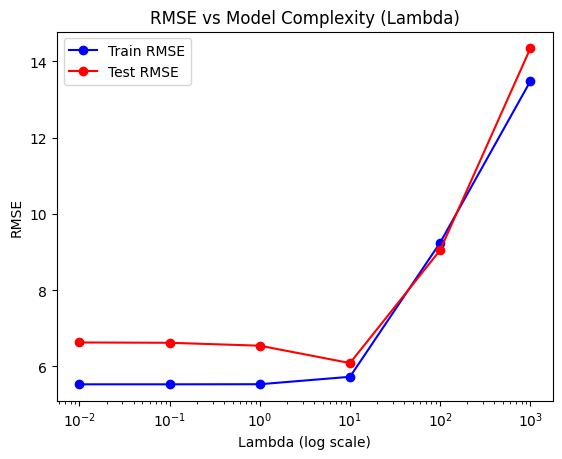

In [244]:
plt.plot(A_Lambda, train_errors, color='blue',label='Train RMSE', marker='o')
plt.plot(A_Lambda, test_errors, color='red',label='Test RMSE', marker='o')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('RMSE')
plt.title('RMSE vs Model Complexity (Lambda)')
plt.legend()

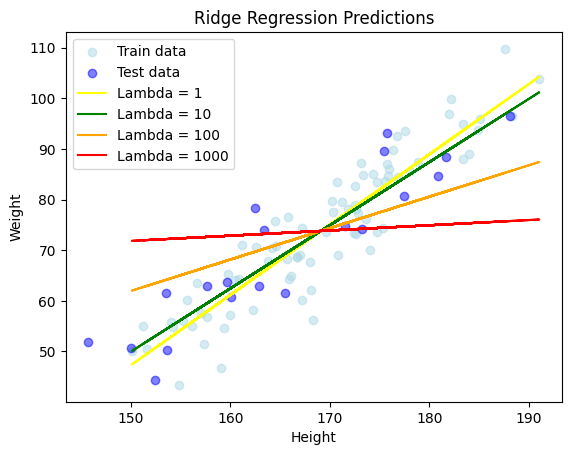

In [241]:


plt.scatter(train[predictors], train[target], color='lightblue', label='Train data', alpha=0.5)
plt.scatter(test[predictors], test[target], color='blue', label='Test data', alpha=0.5)
plt.plot(train[predictors], y_pred_out[2], color='yellow', label= f'Lambda = {A_Lambda[2]}')
plt.plot(train[predictors], y_pred_out[3], color='green', label= f'Lambda = {A_Lambda[3]}')
plt.plot(train[predictors], y_pred_out[4], color='orange', label=f'Lambda = {A_Lambda[4]}')
plt.plot(train[predictors], y_pred_out[5], color='red', label=f'Lambda = {A_Lambda[5]}')


plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Ridge Regression Predictions')
plt.legend()
